In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

import statsmodels.api as sms

from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pd.options.display.float_format = '{:.6f}'.format
pd.set_option("display.max_columns",1000)
import warnings
warnings.filterwarnings("ignore")

import utils


## **Importar Datos**

In [2]:
df=pd.read_csv("Insumos/BaseModelo.csv")

In [3]:
x_cat=pd.read_csv("Insumos/predictores_cat.csv")["Variable"].tolist()
x_cat

['PAY_0_Retraso_2_Mes',
 'PAY_2_Retraso_2_Mes',
 'PAY_3_Retraso_2_Mes',
 'PAY_4_Retraso_2_Mes',
 'PAY_0_Retraso_3_Mes',
 'PAY_0_Retraso_1_Mes',
 'PAY_2_Retraso_3_Mes',
 'PAY_3_Retraso_3_Mes',
 'PAY_4_Retraso_3_Mes',
 'PAY_4_Retraso_7_Mes',
 'PAY_0_Retraso_4_Mes',
 'PAY_4_Retraso_4_Mes',
 'PAY_3_Retraso_4_Mes',
 'PAY_3_Retraso_7_Mes',
 'Educacion_Posgrado',
 'PAY_2_Retraso_4_Mes',
 'Genero_Masculino',
 'Educacion_Secundaria',
 'PAY_2_Retraso_5_Mes',
 'PAY_3_Retraso_6_Mes',
 'PAY_2_Retraso_6_Mes',
 'PAY_4_Retraso_5_Mes',
 'PAY_2_Retraso_7_Mes',
 'PAY_0_Retraso_7_Mes',
 'PAY_3_Retraso_5_Mes',
 'PAY_0_Retraso_8_Mes',
 'EstadoCivil_Soltero',
 'Educacion_Universidad',
 'PAY_0_Retraso_5_Mes',
 'PAY_0_Retraso_6_Mes']

In [4]:
x_num=pd.read_csv("Insumos/predictores_numericos.csv")["Variable"].tolist()
x_num

['MontoCredito',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT3',
 'PAY_AMT5',
 'PAY_AMT6',
 'BILL_AMT1',
 'Edad']

In [5]:
df

,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes,Mora
0,20000.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,3913.000000,24.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,120000.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,2682.000000,26.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,90000.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,29239.000000,34.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,50000.000000,2000.000000,2019.000000,1100.000000,1200.000000,1069.000000,1000.000000,46990.000000,37.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,50000.000000,2000.000000,36681.000000,9000.000000,10000.000000,689.000000,679.000000,8617.000000,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.000000,8500.000000,20000.000000,3047.000000,5003.000000,5000.000000,1000.000000,188948.000000,39.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,150000.000000,1837.000000,3526.000000,129.000000,8998.000000,0.000000,0.000000,1683.000000,43.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
29997,30000.000000,0.000000,0.000000,4200.000000,22000.000000,2000.000000,3100.000000,3565.000000,37.000000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1
29998,80000.000000,85900.000000,3409.000000,1926.000000,1178.000000,52964.000000,1804.000000,-1645.000000,41.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1




# **Modelado**

Los términos inferencia y predicción describen tareas en las que aprendemos de los datos de manera supervisada para encontrar un modelo que describa la relación entre las variables independientes y el resultado. Sin embargo, la inferencia y la predicción divergen cuando se trata del uso del modelo resultante:

* Inferencia: use el modelo para aprender sobre el proceso de generación de datos.
* Predicción: utilice el modelo para predecir los resultados de nuevos puntos de datostos

# **Inferencia:**

In [6]:
Predictores=x_num+x_cat

In [7]:
X=df[Predictores]

In [8]:
X

,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes
0,20000.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,3913.000000,24.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,120000.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,2682.000000,26.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,90000.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,29239.000000,34.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,50000.000000,2000.000000,2019.000000,1100.000000,1200.000000,1069.000000,1000.000000,46990.000000,37.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,50000.000000,2000.000000,36681.000000,9000.000000,10000.000000,689.000000,679.000000,8617.000000,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.000000,8500.000000,20000.000000,3047.000000,5003.000000,5000.000000,1000.000000,188948.000000,39.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
29996,150000.000000,1837.000000,3526.000000,129.000000,8998.000000,0.000000,0.000000,1683.000000,43.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
29997,30000.000000,0.000000,0.000000,4200.000000,22000.000000,2000.000000,3100.000000,3565.000000,37.000000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
29998,80000.000000,85900.000000,3409.000000,1926.000000,1178.000000,52964.000000,1804.000000,-1645.000000,41.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
y=df["Mora"]

## **Sesgo**

In [10]:
y.value_counts(normalize=True)

Mora
0   0.778800
1   0.221200
Name: proportion, dtype: float64

## **División Train- Test**

Evaluar la capacidad predictiva de un modelo consiste en comprobar la aproximación de sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de prueba.

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123, stratify=y)

In [12]:
y_train.value_counts(normalize=True)

Mora
0   0.778810
1   0.221190
Name: proportion, dtype: float64

In [13]:
y_test.value_counts(normalize=True)

Mora
0   0.778778
1   0.221222
Name: proportion, dtype: float64

## **Ajuste Regresión Logística**

La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.


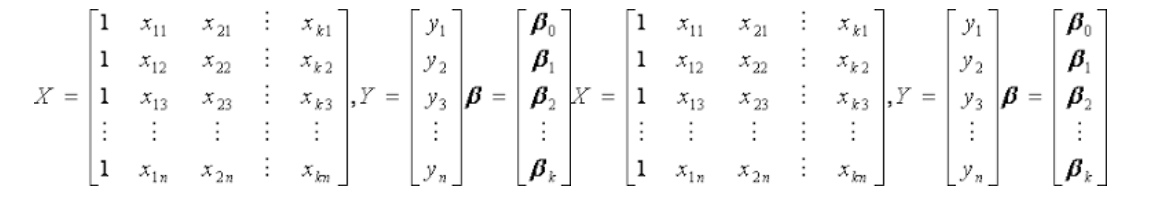

In [14]:
x_train_1=sms.add_constant(x_train)
x_test_1=sms.add_constant(x_test)
x_train_1

,const,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes
14451,1.000000,20000.000000,390.000000,780.000000,780.000000,780.000000,390.000000,780.000000,2912.000000,52.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
18392,1.000000,230000.000000,237.000000,586.000000,1249.000000,12511.000000,0.000000,0.000000,160.000000,24.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
24955,1.000000,360000.000000,238.000000,0.000000,200.000000,3730.000000,0.000000,0.000000,0.000000,31.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
7162,1.000000,90000.000000,5000.000000,4300.000000,3500.000000,3500.000000,3700.000000,3100.000000,89947.000000,26.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12125,1.000000,20000.000000,0.000000,1118.000000,694.000000,412.000000,0.000000,300.000000,6345.000000,29.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,1.000000,280000.000000,0.000000,8000.000000,5000.000000,6000.000000,10000.000000,5000.000000,238094.000000,40.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3228,1.000000,50000.000000,2228.000000,2500.000000,1457.000000,1660.000000,1300.000000,1340.000000,43721.000000,26.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23477,1.000000,100000.000000,0.000000,1850.000000,1500.000000,3200.000000,0.000000,1500.000000,31708.000000,30.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
22177,1.000000,310000.000000,1261.000000,1261.000000,0.000000,1651.000000,390.000000,390.000000,1261.000000,27.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [15]:
## Entranamiento

In [16]:
Modelo_Logit=sms.Logit(endog=y_train,exog=x_train_1).fit(method="bfgs")

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3


In [17]:
Modelo_Logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: -0.312    
Dependent Variable:  Mora             AIC:              29192.1816
Date:                2024-07-15 17:11 BIC:              29510.2727
No. Observations:    21000            Log-Likelihood:   -14556.   
Df Model:            39               LL-Null:          -11097.   
Df Residuals:        20960            LLR p-value:      1.0000    
Converged:           0.0000           Scale:            1.0000    
Method:              MLE                                          
------------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|   [0.025 0.975]
------------------------------------------------------------------
const                 0.0000   0.2228 0.0000 1.0000 -0.4367 0.4367
MontoCredito          0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT1              0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT2              0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT4              0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT3              0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT5              0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT6              0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
BILL_AMT1             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
Edad                  0.0000   0.0018 0.0000 1.0000 -0.0035 0.0035
PAY_0_Retraso_2_Mes   0.0000   0.0604 0.0000 1.0000 -0.1183 0.1183
PAY_2_Retraso_2_Mes   0.0000   0.0622 0.0000 1.0000 -0.1219 0.1219
PAY_3_Retraso_2_Mes   0.0000   0.0591 0.0000 1.0000 -0.1158 0.1158
PAY_4_Retraso_2_Mes   0.0000   0.0577 0.0000 1.0000 -0.1130 0.1130
PAY_0_Retraso_3_Mes   0.0000   0.1499 0.0000 1.0000 -0.2939 0.2939
PAY_0_Retraso_1_Mes   0.0000   0.0503 0.0000 1.0000 -0.0986 0.0986
PAY_2_Retraso_3_Mes   0.0000   0.1559 0.0000 1.0000 -0.3055 0.3055
PAY_3_Retraso_3_Mes   0.0000   0.2004 0.0000 1.0000 -0.3928 0.3928
PAY_4_Retraso_3_Mes   0.0000   0.2093 0.0000 1.0000 -0.4101 0.4101
PAY_4_Retraso_7_Mes   0.0000   0.4579 0.0000 1.0000 -0.8975 0.8975
PAY_0_Retraso_4_Mes   0.0000   0.3055 0.0000 1.0000 -0.5987 0.5987
PAY_4_Retraso_4_Mes   0.0000   0.3797 0.0000 1.0000 -0.7442 0.7442
PAY_3_Retraso_4_Mes   0.0000   0.4397 0.0000 1.0000 -0.8617 0.8617
PAY_3_Retraso_7_Mes   0.0000   0.6253 0.0000 1.0000 -1.2255 1.2255
Educacion_Posgrado    0.0000   0.2122 0.0000 1.0000 -0.4160 0.4160
PAY_2_Retraso_4_Mes   0.0000   0.3384 0.0000 1.0000 -0.6632 0.6632
Genero_Masculino      0.0000   0.0286 0.0000 1.0000 -0.0560 0.0560
Educacion_Secundaria  0.0000   0.2143 0.0000 1.0000 -0.4199 0.4199
PAY_2_Retraso_5_Mes   0.0000   0.7656 0.0000 1.0000 -1.5006 1.5006
PAY_3_Retraso_6_Mes   0.0000   1.6595 0.0000 1.0000 -3.2526 3.2526
PAY_2_Retraso_6_Mes   0.0000   1.6653 0.0000 1.0000 -3.2639 3.2639
PAY_4_Retraso_5_Mes   0.0000   0.7185 0.0000 1.0000 -1.4083 1.4083
PAY_2_Retraso_7_Mes   0.0000   1.7217 0.0000 1.0000 -3.3745 3.3745
PAY_0_Retraso_7_Mes   0.0000   1.6766 0.0000 1.0000 -3.2861 3.2861
PAY_3_Retraso_5_Mes   0.0000   0.9139 0.0000 1.0000 -1.7912 1.7912
PAY_0_Retraso_8_Mes   0.0000   1.5550 0.0000 1.0000 -3.0477 3.0477
EstadoCivil_Soltero   0.0000   0.0317 0.0000 1.0000 -0.0622 0.0622
Educacion_Universidad 0.0000   0.2121 0.0000 1.0000 -0.4157 0.4157
PAY_0_Retraso_5_Mes   0.0000   0.5685 0.0000 1.0000 -1.1142 1.1142
PAY_0_Retraso_6_Mes   0.0000   1.0087 0.0000 1.0000 -1.9771 1.9771
==================================================================

"""

## **Supuesto de los Modelos Lineales**
* No multicolinealidad: Se espera que las variables predictoras no estén altamente correlacionadas entre sí, ya que la multicolinealidad puede dificultar la interpretación de los coeficientes y hacer que las estimaciones sean inestables.


In [18]:
x_train_1.shape

(21000, 40)

In [19]:
x_train

,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes
14451,20000.000000,390.000000,780.000000,780.000000,780.000000,390.000000,780.000000,2912.000000,52.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
18392,230000.000000,237.000000,586.000000,1249.000000,12511.000000,0.000000,0.000000,160.000000,24.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
24955,360000.000000,238.000000,0.000000,200.000000,3730.000000,0.000000,0.000000,0.000000,31.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
7162,90000.000000,5000.000000,4300.000000,3500.000000,3500.000000,3700.000000,3100.000000,89947.000000,26.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12125,20000.000000,0.000000,1118.000000,694.000000,412.000000,0.000000,300.000000,6345.000000,29.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,280000.000000,0.000000,8000.000000,5000.000000,6000.000000,10000.000000,5000.000000,238094.000000,40.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3228,50000.000000,2228.000000,2500.000000,1457.000000,1660.000000,1300.000000,1340.000000,43721.000000,26.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23477,100000.000000,0.000000,1850.000000,1500.000000,3200.000000,0.000000,1500.000000,31708.000000,30.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
22177,310000.000000,1261.000000,1261.000000,0.000000,1651.000000,390.000000,390.000000,1261.000000,27.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


## **El Análisis de VIF (Variance Inflation Factor, por sus siglas en inglés)**

La multicolinealidad entre variables independientes en un modelo de regresión. La multicolinealidad es una situación en la que dos o más variables independientes en un modelo de regresión están altamente correlacionadas entre sí, lo que puede causar problemas al estimar los coeficientes de regresión y dificultar la interpretación de los resultados.

El VIF mide cuánto se infla la varianza de los coeficientes de regresión debido a la multicolinealidad. Un VIF alto indica una alta multicolinealidad y sugiere que una variable es predecible a partir de las otras en el modelo. Generalmente, se considera que un VIF mayor a 10 o 5 indica multicolinealidad problemática

In [20]:
p_valores=Modelo_Logit.pvalues
len(p_valores)

40

In [21]:
variables_significativas=p_valores[p_valores<0.05].index
variables_significativas

Index([], dtype='object')

In [22]:
ResultadoVif=pd.DataFrame()
ResultadoVif["Variable"]=x_train.columns
ResultadoVif["Vif"]=[variance_inflation_factor(x_train.values,i) for i in range(len(x_train.columns)) ]  

In [23]:
EliminarPorVif=ResultadoVif["Variable"][ResultadoVif["Vif"]>=4].tolist()

In [24]:
EliminarPorVif

['Edad',
 'Educacion_Posgrado',
 'Educacion_Secundaria',
 'PAY_3_Retraso_6_Mes',
 'PAY_2_Retraso_6_Mes',
 'PAY_2_Retraso_7_Mes',
 'PAY_0_Retraso_7_Mes',
 'PAY_0_Retraso_8_Mes',
 'Educacion_Universidad']

In [25]:
x_train_1.drop(columns=EliminarPorVif,inplace=True)
x_test_1.drop(columns=EliminarPorVif,inplace=True)

In [26]:
Modelo_Logit_2=sms.Logit(endog=y_train,exog=x_train_1).fit(method="bfgs")

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3


In [27]:
Modelo_Logit_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: -0.312    
Dependent Variable: Mora             AIC:              29174.1816
Date:               2024-07-15 17:11 BIC:              29420.7022
No. Observations:   21000            Log-Likelihood:   -14556.   
Df Model:           30               LL-Null:          -11097.   
Df Residuals:       20969            LLR p-value:      1.0000    
Converged:          0.0000           Scale:            1.0000    
Method:             MLE                                          
-----------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
const                0.0000   0.0327 0.0000 1.0000 -0.0641 0.0641
MontoCredito         0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT1             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT2             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT4             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT3             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT5             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT6             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
BILL_AMT1            0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_0_Retraso_2_Mes  0.0000   0.0603 0.0000 1.0000 -0.1183 0.1183
PAY_2_Retraso_2_Mes  0.0000   0.0621 0.0000 1.0000 -0.1217 0.1217
PAY_3_Retraso_2_Mes  0.0000   0.0590 0.0000 1.0000 -0.1155 0.1155
PAY_4_Retraso_2_Mes  0.0000   0.0576 0.0000 1.0000 -0.1129 0.1129
PAY_0_Retraso_3_Mes  0.0000   0.1494 0.0000 1.0000 -0.2928 0.2928
PAY_0_Retraso_1_Mes  0.0000   0.0502 0.0000 1.0000 -0.0984 0.0984
PAY_2_Retraso_3_Mes  0.0000   0.1554 0.0000 1.0000 -0.3045 0.3045
PAY_3_Retraso_3_Mes  0.0000   0.1999 0.0000 1.0000 -0.3919 0.3919
PAY_4_Retraso_3_Mes  0.0000   0.2086 0.0000 1.0000 -0.4089 0.4089
PAY_4_Retraso_7_Mes  0.0000   0.4508 0.0000 1.0000 -0.8835 0.8835
PAY_0_Retraso_4_Mes  0.0000   0.3054 0.0000 1.0000 -0.5986 0.5986
PAY_4_Retraso_4_Mes  0.0000   0.3666 0.0000 1.0000 -0.7185 0.7185
PAY_3_Retraso_4_Mes  0.0000   0.4250 0.0000 1.0000 -0.8331 0.8331
PAY_3_Retraso_7_Mes  0.0000   0.6132 0.0000 1.0000 -1.2018 1.2018
PAY_2_Retraso_4_Mes  0.0000   0.3363 0.0000 1.0000 -0.6591 0.6591
Genero_Masculino     0.0000   0.0283 0.0000 1.0000 -0.0555 0.0555
PAY_2_Retraso_5_Mes  0.0000   0.7480 0.0000 1.0000 -1.4661 1.4661
PAY_4_Retraso_5_Mes  0.0000   0.4104 0.0000 1.0000 -0.8043 0.8043
PAY_3_Retraso_5_Mes  0.0000   0.6042 0.0000 1.0000 -1.1842 1.1842
EstadoCivil_Soltero  0.0000   0.0278 0.0000 1.0000 -0.0545 0.0545
PAY_0_Retraso_5_Mes  0.0000   0.5598 0.0000 1.0000 -1.0973 1.0973
PAY_0_Retraso_6_Mes  0.0000   0.9775 0.0000 1.0000 -1.9160 1.9160
=================================================================

"""

In [28]:
p_valores=Modelo_Logit_2.pvalues
len(p_valores)
variables_significativas=p_valores[p_valores<0.05].index
variables_significativas

Index([], dtype='object')

In [29]:
ResultadoVif=pd.DataFrame()
ResultadoVif["Variable"]=x_train_1.columns
ResultadoVif["Vif"]=[variance_inflation_factor(x_train_1.values,i) for i in range(len(x_train_1.columns)) ]  

## **Eliminación Automática de Variables**

La eliminación automática de variables en un modelo de regresión, ya sea hacia adelante o hacia atrás, es un enfoque para seleccionar un subconjunto óptimo de características predictoras en función de ciertos criterios. Estos métodos ayudan a simplificar el modelo y reducir la multicolinealidad, el sobreajuste y el ruido, lo que puede mejorar la capacidad predictiva del modelo.

## **Forward Selection**

Eliminación hacia adelante (Forward Selection): En este enfoque, comienzas con un modelo vacío (sin variables predictoras) y luego iterativamente agregas una variable a la vez. En cada paso, seleccionas la variable que proporciona la mejora más significativa en el ajuste del modelo (por ejemplo, reduce el error residual o aumenta el estadístico F). Continúas agregando variables hasta que no haya más mejoras significativas. Esto se hace generalmente con la ayuda de criterios estadísticos, como el valor p o el valor F

## **Backward Elimination**

Eliminación hacia atrás (Backward Elimination): En este enfoque, comienzas con un modelo que incluye todas las variables predictoras y luego, en cada paso, eliminas la variable que menos contribuye al ajuste del modelo. Continúas eliminando variables hasta que no haya más variables que puedan eliminarse sin empeorar significativamente el modelo

* https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
  .

In [30]:
modelo_base=LogisticRegression()

In [31]:
#Selector=SequentialFeatureSelector(modelo_base,direction="backward") #forward
#Selector.fit(x_train,y_train)

In [32]:
#x_train_1.columns[Selector.get_support()].tolist()

In [33]:
x_test.head()

,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes
45,210000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
18762,420000.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,84363.000000,52898.000000,29.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9341,70000.000000,3400.000000,2310.000000,1600.000000,1600.000000,1700.000000,2000.000000,67306.000000,35.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
21814,180000.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
25950,410000.000000,388.000000,388.000000,110345.000000,388.000000,8000.000000,4200.000000,388.000000,32.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
VariablesForward=['const',
 'PAY_0_Retraso_2_Mes',
 'PAY_2_Retraso_2_Mes',
 'PAY_4_Retraso_2_Mes',
 'PAY_0_Retraso_3_Mes',
 'PAY_0_Retraso_1_Mes',
 'PAY_2_Retraso_3_Mes',
 'PAY_4_Retraso_3_Mes',
 'PAY_0_Retraso_4_Mes',
 'Edad',
 'PAY_3_Retraso_4_Mes',
 'Educacion_Universidad',
 'PAY_0_Retraso_5_Mes',"EstadoCivil_Soltero"]

VariablesBackward=['const',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT3',
 'PAY_AMT5',
 'PAY_0_Retraso_2_Mes',
 'PAY_4_Retraso_2_Mes',
 'PAY_0_Retraso_3_Mes',
 'PAY_4_Retraso_7_Mes',
 'PAY_4_Retraso_4_Mes',
 'PAY_3_Retraso_4_Mes',
 'PAY_2_Retraso_4_Mes',
 'PAY_2_Retraso_5_Mes',
 'PAY_3_Retraso_5_Mes',
 'PAY_0_Retraso_5_Mes']

In [35]:
x_train_2=sms.add_constant(x_train)[VariablesForward]
x_test_2=sms.add_constant(x_test)[VariablesForward]

In [36]:
Modelo_Logit_3=sms.Logit(endog=y_train,exog=x_train_2).fit(method="bfgs")

         Current function value: 0.447864
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


In [37]:
Modelo_Logit_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Pseudo R-squared:  0.152     
Dependent Variable:    Mora              AIC:               18838.2980
Date:                  2024-07-15 17:11  BIC:               18949.6299
No. Observations:      21000             Log-Likelihood:    -9405.1   
Df Model:              13                LL-Null:           -11097.   
Df Residuals:          20986             LLR p-value:       0.0000    
Converged:             0.0000            Scale:             1.0000    
Method:                MLE                                            
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -2.0826   0.0994 -20.9434 0.0000 -2.2775 -1.8877
PAY_0_Retraso_2_Mes    2.0170   0.0650  31.0399 0.0000  1.8896  2.1443
PAY_2_Retraso_2_Mes    0.5323   0.0621   8.5704 0.0000  0.4106  0.6540
PAY_4_Retraso_2_Mes    0.7738   0.0563  13.7341 0.0000  0.6634  0.8842
PAY_0_Retraso_3_Mes    1.4225   0.1523   9.3379 0.0000  1.1239  1.7211
PAY_0_Retraso_1_Mes    0.8203   0.0568  14.4357 0.0000  0.7089  0.9317
PAY_2_Retraso_3_Mes    1.1164   0.1669   6.6891 0.0000  0.7893  1.4436
PAY_4_Retraso_3_Mes    0.6079   0.2205   2.7573 0.0058  0.1758  1.0401
PAY_0_Retraso_4_Mes    0.5106   0.3120   1.6365 0.1017 -0.1009  1.1221
Edad                   0.0061   0.0022   2.7267 0.0064  0.0017  0.0105
PAY_3_Retraso_4_Mes    0.2409   0.3236   0.7443 0.4567 -0.3934  0.8752
Educacion_Universidad  0.0374   0.0373   1.0032 0.3158 -0.0357  0.1105
PAY_0_Retraso_5_Mes    0.0885   0.5661   0.1563 0.8758 -1.0210  1.1980
EstadoCivil_Soltero   -0.0635   0.0419  -1.5158 0.1296 -0.1457  0.0186
======================================================================

"""

In [38]:
p_valores=Modelo_Logit_3.pvalues
print(len(p_valores))
variables_significativas=p_valores[p_valores<0.05].index
len(variables_significativas)

14


9

In [39]:
coefientes=Modelo_Logit_3.params
odds_ratios=np.exp(coefientes)
odds_ratios

const                   0.124611
PAY_0_Retraso_2_Mes     7.515501
PAY_2_Retraso_2_Mes     1.702822
PAY_4_Retraso_2_Mes     2.167980
PAY_0_Retraso_3_Mes     4.147407
PAY_0_Retraso_1_Mes     2.271143
PAY_2_Retraso_3_Mes     3.053956
PAY_4_Retraso_3_Mes     1.836634
PAY_0_Retraso_4_Mes     1.666252
Edad                    1.006118
PAY_3_Retraso_4_Mes     1.272388
Educacion_Universidad   1.038127
PAY_0_Retraso_5_Mes     1.092508
EstadoCivil_Soltero     0.938431
dtype: float64

In [40]:
# 0=Septiembre, 2:Agosto

* PAY_0_Retraso_2_Mes	1.9962

* Coeficiente (Coef.): Indica la dirección y magnitud del efecto de la variable predictora en la variable de respuesta. Un coeficiente positivo sugiere que un aumento en la variable predictora aumenta la probabilidad del evento de interés, mientras que un coeficiente negativo sugiere lo contrario.

* Los Clientes que acorte del mes de Septiembre, tenian 2 meses de Mora, se les aumenta los odds (ratios de logaritmo de las probabilidades) en 1.99  en comparación a los que no presentan Mora de 2 meses en Septiembre; La variable tiene un p valor de 0.0000	, menor a 0.05, por lo tanto se concluye que es  estadisticamnete significativa, de lo contrario no podemos concluir nada sobre ella.

exp(coef)

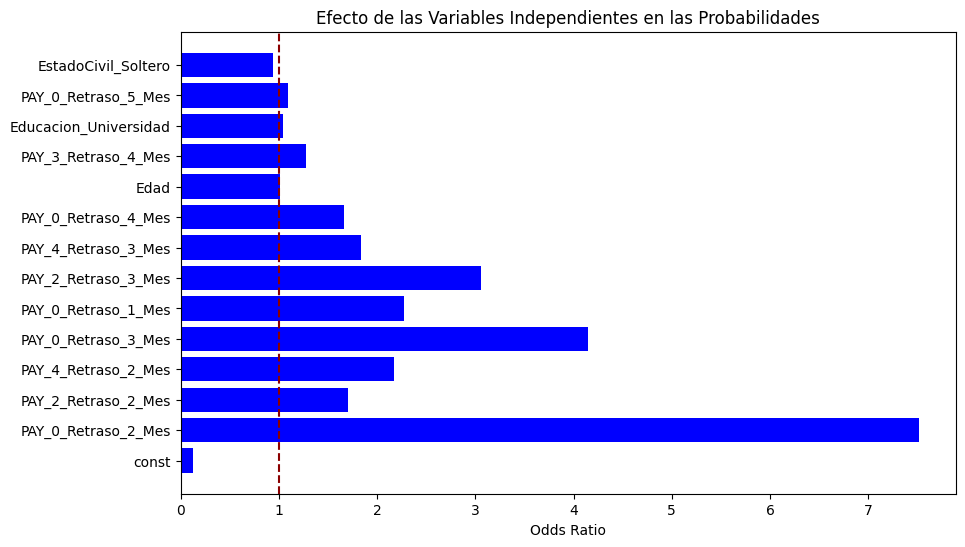

In [41]:
Variables=odds_ratios.index.tolist()
exp=odds_ratios.values.tolist()
plt.figure(figsize=(10, 6))
plt.barh(Variables, exp, color='blue')
plt.axvline(x=1,color="darkred",linestyle="--")
plt.xlabel('Odds Ratio')
plt.title('Efecto de las Variables Independientes en las Probabilidades');

Un odds ratio mayor a 1 indica un aumento en la probabilidad del evento, mientras que un odds ratio menor a 1 indica una disminución en la probabilidad.

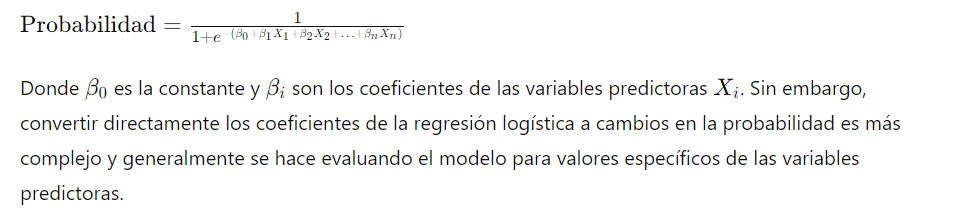

In [42]:
(1-0.938431)*100

6.1568999999999985

In [43]:
 (7.515501-1)

6.515501

In [44]:
( 1.006118-1)*100

0.6118000000000068

## **¿Poder Predictivo?**

In [45]:
x_train_2

,const,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_0_Retraso_4_Mes,Edad,PAY_3_Retraso_4_Mes,Educacion_Universidad,PAY_0_Retraso_5_Mes,EstadoCivil_Soltero
14451,1.000000,0,0,0,0,0,0,0,0,52.000000,0,0,0,0
18392,1.000000,0,0,0,0,0,0,0,0,24.000000,0,1,0,1
24955,1.000000,0,0,0,0,1,0,0,0,31.000000,0,0,0,1
7162,1.000000,1,0,0,0,0,0,0,0,26.000000,0,1,0,0
12125,1.000000,0,1,0,0,1,0,0,0,29.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,1.000000,0,1,0,0,1,0,0,0,40.000000,0,1,0,0
3228,1.000000,0,0,0,0,0,0,0,0,26.000000,0,1,0,0
23477,1.000000,0,1,0,0,1,0,0,0,30.000000,0,1,0,1
22177,1.000000,0,0,0,0,0,0,0,0,27.000000,0,1,0,1


In [46]:
y_train

14451    0
18392    1
24955    0
7162     0
12125    0
        ..
27165    0
3228     0
23477    1
22177    1
13416    0
Name: Mora, Length: 21000, dtype: int64

## **Predicciones Train**

In [47]:
Probabilidades_Train=Modelo_Logit_3.predict(exog=x_train_2)

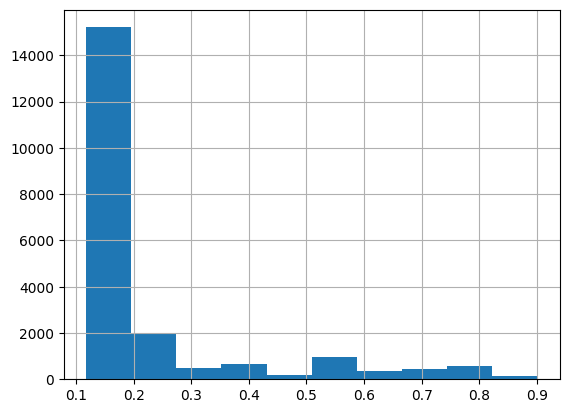

In [48]:
Probabilidades_Train.hist();

In [49]:
Predicciones_Train=np.where(Probabilidades_Train<0.5,0,1)

In [50]:
pd.Series(Predicciones_Train).value_counts()

0    18418
1     2582
Name: count, dtype: int64

In [51]:
Resultado=pd.DataFrame({"Predicciones":Predicciones_Train,"Realidad":y_train,"Prob":Probabilidades_Train})

In [52]:
pd.crosstab(Resultado["Predicciones"],Resultado["Realidad"])

Realidad,0,1
Predicciones,,
0,15475,2943
1,880,1702


## **Evaluación en Entranamiento**

La matriz de confusión
La matriz de confusión es una herramienta fundamental en el campo de la clasificación en aprendizaje automático y estadísticas. Se utiliza para evaluar el rendimiento de un modelo de clasificación al comparar las predicciones del modelo con los valores reales o etiquetas de las observaciones en un conjunto de datos. La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas que realiza un modelo, y es especialmente útil cuando se trabaja con problemas de clasificación binaria (dos clases) o clasificación multiclase (más de dos clases).

La matriz de confusión se compone de cuatro elementos principales:

Verdaderos Positivos (TP - True Positives): Representa el número de observaciones que el modelo predijo correctamente como positivas (clase positiva) cuando en realidad eran positivas.

Falsos Negativos (FN - False Negatives): Indica el número de observaciones que el modelo predijo incorrectamente como negativas (clase negativa) cuando en realidad eran positivas.

Falsos Positivos (FP - False Positives): Muestra el número de observaciones que el modelo predijo incorrectamente como positivas cuando en realidad eran negativas.

Verdaderos Negativos (TN - True Negatives): Representa la cantidad de observaciones que el modelo predijo correctamente como negativas cuando en realidad eran negativas.

**Trade - off Sesgo - Varianza**

Accuracy: 0.817952380952381
Reporte :               precision    recall  f1-score   support

           0       0.84      0.95      0.89     16355
           1       0.66      0.37      0.47      4645

    accuracy                           0.82     21000
   macro avg       0.75      0.66      0.68     21000
weighted avg       0.80      0.82      0.80     21000



Predicciones,0,1,All
Realidad,,,
0,15475,880,16355
1,2943,1702,4645
All,18418,2582,21000


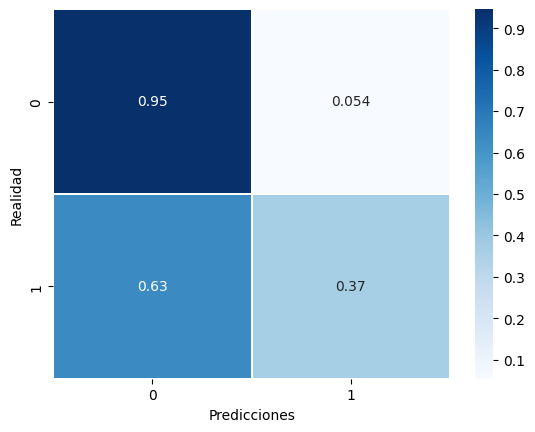

In [53]:
utils.MetricasMatrizConfusion(y=y_train,Modelo=Modelo_Logit_3,X=x_train_2,tipo="Logit")

In [54]:
Accuracy =metrics.accuracy_score(y_train,Predicciones_Train)
print(f'Accuracy: {Accuracy}')
Reporte=metrics.classification_report(y_train,Predicciones_Train)
print(f'Reporte : {Reporte}')

Accuracy: 0.817952380952381
Reporte :               precision    recall  f1-score   support

           0       0.84      0.95      0.89     16355
           1       0.66      0.37      0.47      4645

    accuracy                           0.82     21000
   macro avg       0.75      0.66      0.68     21000
weighted avg       0.80      0.82      0.80     21000



## **Curva ROC**

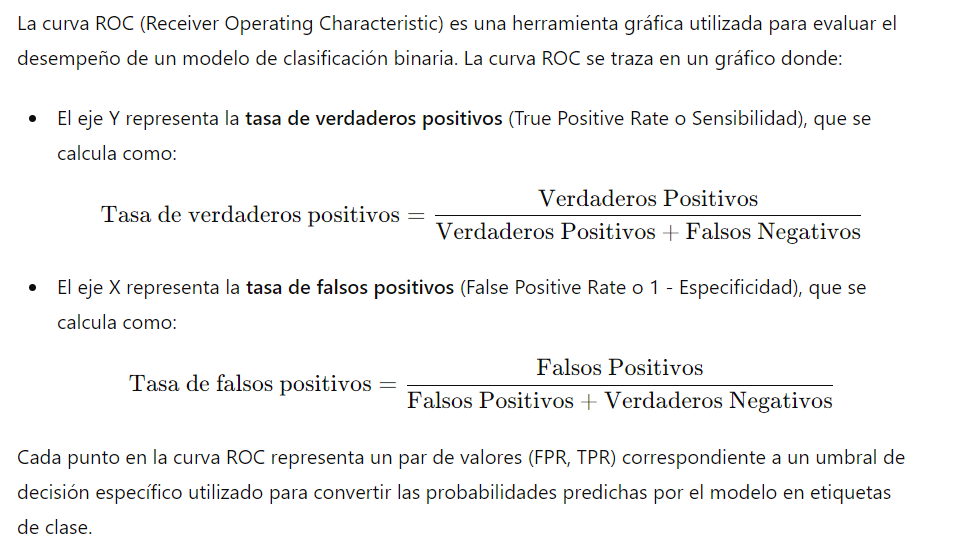

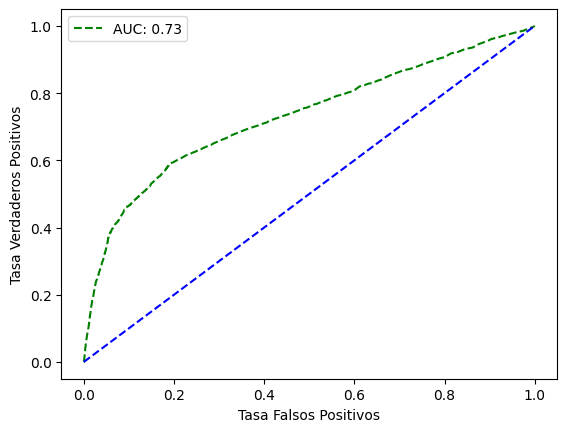

0.7307397921322488

In [55]:
utils.curva_roc(y=y_train,Modelo=Modelo_Logit_3,X=x_train_2,tipo="Logit")

## **Test**

Accuracy: 0.8207777777777778
Reporte :               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.37      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



Predicciones,0,1,All
Realidad,,,
0,6655,354,7009
1,1259,732,1991
All,7914,1086,9000


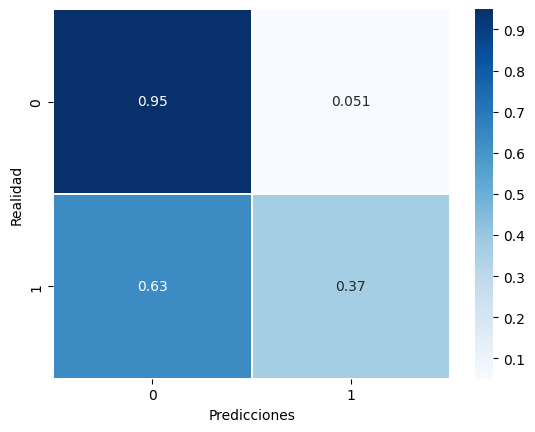

In [56]:
utils.MetricasMatrizConfusion(y=y_test,Modelo=Modelo_Logit_3,X=x_test_2,tipo="Logit")

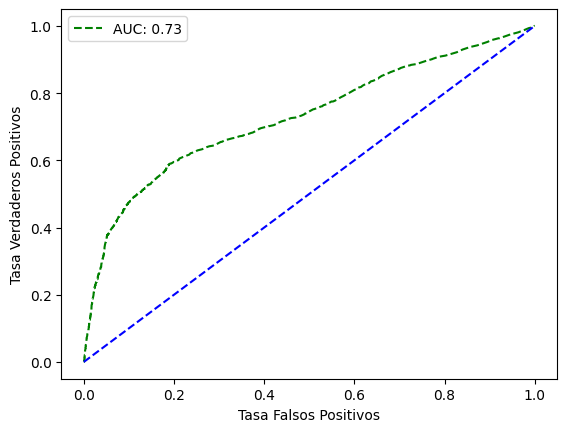

0.7288930878065291

In [57]:
utils.curva_roc(y=y_test,Modelo=Modelo_Logit_3,X=x_test_2,tipo="Logit")

## **Modelos Machine Learning (Poder Predictivo)**

* https://pycaret.org/

PyCaret es una biblioteca de código abierto de aprendizaje automático (machine learning) para Python que facilita y agiliza el proceso de desarrollo y experimentación con modelos de aprendizaje automático. Fue desarrollado para simplificar tareas comunes en el flujo de trabajo de aprendizaje automático, como la preparación de datos, la selección de características, la creación de modelos, la evaluación y comparación de modelos, y la interpretación de resultados.

Las características principales de PyCaret son:

Interfaz sencilla: PyCaret proporciona una interfaz de línea de comandos simple e intuitiva, lo que lo hace accesible incluso para usuarios nuevos en aprendizaje automático.

Automatización del flujo de trabajo: PyCaret automatiza muchas de las tareas repetitivas y tediosas que generalmente se realizan en el proceso de desarrollo de modelos, lo que permite a los usuarios centrarse más en la experimentación y la iteración rápida.

Soporte para múltiples bibliotecas de aprendizaje automático: PyCaret es compatible con varias bibliotecas populares de aprendizaje automático, como scikit-learn, XGBoost, LightGBM, CatBoost, etc. Esto permite a los usuarios comparar fácilmente diferentes algoritmos sin necesidad de escribir mucho código.

Funciones de preprocesamiento de datos: PyCaret ofrece funcionalidades para la preparación y limpieza de datos, incluyendo manejo de valores faltantes, codificación de variables categóricas, y más.

Comparación de modelos: PyCaret permite comparar rápidamente el rendimiento de varios modelos utilizando diferentes métricas, lo que ayuda a seleccionar el mejor modelo para un problema en particular.

Sintonización automática de hiperparámetros: PyCaret puede realizar automáticamente la búsqueda de hiperparámetros para optimizar los modelos, lo que reduce la necesidad de ajustar manualmente los hiperparámetros.

Interpretación de modelos: PyCaret ofrece funciones para interpretar y visualizar los modelos entrenados, lo que facilita la comprensión de cómo funcionan y qué características son más importantes para la predicción.

En general, PyCaret es una excelente herramienta para acelerar y simplificar el proceso de desarrollo de modelos de aprendizaje automático, lo que lo hace especialmente útil para usuarios que deseen experimentar con diferentes algoritmos y técnicas de manera eficiente. Sin embargo, es importante tener en cuenta que, como en cualquier biblioteca de alto nivel, la flexibilidad y control sobre el flujo de trabajo pueden ser más limitados que al utilizar bibliotecas de nivel más bajo como scikit-learn.

In [58]:
from pycaret.classification import *